# Do mountaineers die younger?

![Hermann Buhl](buhl2.webp)


A question often asked and typically answered with an emphatic _YES_ is if mountaineers and climbers do indeed die younger than people with less exposure to severe weather conditions, high altitude, and overhanging rock. Here's a little attempt to answer this question, using the __Wikipedia API__ to get the data, some processing of the text data, and some basic data visualisation.

In [69]:
## Import stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import wikipedia
import wikipediaapi
import re

%matplotlib inline  
pd.set_option('display.max_colwidth', 150)


In [70]:
## Get data from Wikipedia; if this fails, try a few more times
article_name = "List of climbers and mountaineers"

## initialize wiki page
wiki_wiki = wikipediaapi.Wikipedia('en')
mountaineers = wiki_wiki.page(article_name)

## get only the text data
mountaineers = mountaineers.text

In [71]:
## Check data
print("Type is: ", type(mountaineers))
print("Number of letters: ", len(mountaineers))

Type is:  <class 'str'>
Number of letters:  49645


In [72]:
## Split at new line and glimpse at the data
mountaineers = mountaineers.split("\n")
mountaineers = mountaineers[3:]
print("Number of entries: ", len(mountaineers))
mountaineers[:10]

Number of entries:  588


['Vitaly Abalakov (1906–1992) Russia, climbed Lenin Peak (1934) and Khan Tengri (1936)',
 'Yevgeniy Abalakov (1907–1948) Russia, climbed Communism Peak (1933)',
 'Premlata Agarwal (born 1963) India, first Indian woman to complete all Seven Summits',
 'H. P. S. Ahluwalia (fl. 1965) India, climbed Mount Everest in 1965',
 'Pierre Allain (1904–2000) France, championed bouldering at Fontainebleau, and inventor of rubber rock-climbing shoes',
 'Christian Almer (1826–1898) Switzerland, numerous first ascents, including Eiger',
 'Ashraf Aman (born 1943) Pakistan, first Pakistani ascent of K2',
 'Luigi Amedeo, Duke of Abruzzi (1873–1933) Italy, first ascent of Mount Saint Elias of the Rwenzori Mountains',
 'Pat Ament (born 1946) US, rock climber and pioneer boulderer',
 'Melchior Anderegg (1827–1912) Switzerland, guide, with numerous first ascents, including new routes on Mont Blanc']

We can see that we now have a list of strings, one for each mountaineer, typically starting with their name, birth (and death) year, country, and some additional informationon their accomplishments in the mountains. In the following, we will grab the relevant info so we can plot what we're interested in.

In [73]:
## Turn into pandas df
df = pd.DataFrame(mountaineers)
df.head(10)

,0
0,"Vitaly Abalakov (1906–1992) Russia, climbed Lenin Peak (1934) and Khan Tengri (1936)"
1,"Yevgeniy Abalakov (1907–1948) Russia, climbed Communism Peak (1933)"
2,"Premlata Agarwal (born 1963) India, first Indian woman to complete all Seven Summits"
3,"H. P. S. Ahluwalia (fl. 1965) India, climbed Mount Everest in 1965"
4,"Pierre Allain (1904–2000) France, championed bouldering at Fontainebleau, and inventor of rubber rock-climbing shoes"
5,"Christian Almer (1826–1898) Switzerland, numerous first ascents, including Eiger"
6,"Ashraf Aman (born 1943) Pakistan, first Pakistani ascent of K2"
7,"Luigi Amedeo, Duke of Abruzzi (1873–1933) Italy, first ascent of Mount Saint Elias of the Rwenzori Mountains"
8,"Pat Ament (born 1946) US, rock climber and pioneer boulderer"
9,"Melchior Anderegg (1827–1912) Switzerland, guide, with numerous first ascents, including new routes on Mont Blanc"


In [74]:
df.tail(10)

,0
578,"Wawrzyniec Żuławski (1916–1957) Polish composer, music critic and teacher; died during Mont Blanc rescue mission; son of Jerzy Żuławski"
579,"Matthias Zurbriggen (1856–1917) Switzerland, first ascent Aconcagua (1897)"
580,
581,See also
582,List of 20th-century summiters of Mount Everest
583,
584,References
585,External links
586,
587,Mountaineering Who's Who


In [75]:
## Drop last rows that contain Wikipedia links
df.drop(df.tail(8).index,inplace=True) # drop last n rows
df.tail()


,0
575,"Jerzy Żuławski (1874–1915) Polish literary figure, philosopher, translator and alpinist"
576,"Juliusz Żuławski (1910–1999) Polish poet, prose writer, literary critic, translator and climber; son of Jerzy Żuławski"
577,"Marek Żuławski (1908–1985) Polish painter, graphic artist, author and climber; son of Jerzy Żuławski"
578,"Wawrzyniec Żuławski (1916–1957) Polish composer, music critic and teacher; died during Mont Blanc rescue mission; son of Jerzy Żuławski"
579,"Matthias Zurbriggen (1856–1917) Switzerland, first ascent Aconcagua (1897)"


In [76]:
## Grab the name, which is always followed by a bracket
df = df[0].str.split("(", n=1, expand=True)
df = df.rename(columns={0: "Name"})
df.sample(10)

,Name,1
187,Dave Graham,"born 1981) US, rock climber and boulderer"
513,Luis Trenker,"1892–1990) Italy, mountaineer, film director and writer"
104,Kenton Cool,"born 1973) UK, sixteen-time Everest summiter"
534,Allison Vest,"born 1995) Canada, two-time Canadian Bouldering Nationals champion"
153,F,None
285,Layton Kor,"1938–2013) US, rock climber and mountaineer, author of Beyond the Vertical"
454,"Steve Roper guidebook writer, editor of Ascent, first ascent of West Butress of El Capitan.",None
78,Una Cameron,"1904–1987) UK, ascents in Alps, Caucasus and Africa"
82,Riccardo Cassin,"1909–2009) Italy, first ascent Piz Badile north-east face (1937); Grandes Jorasses Walker Spur (1938); Mount McKinley Cassin Ridge (1961)"
144,Albert R. Ellingwood,"22 June 1887 – 12 May 1934) pioneer of Colorado climbing: La Plata Peak Ellingwood Ridge, Ellingwood Ledges on Crestone Needle, Lizard Head, and T..."


In [77]:
## Check where name is longer than 6 words
df[df["Name"].str.split(" ").str.len() > 6]

,Name,1
17,"Abdul Jabbar Bhatti, Pakistani mountaineer and the former military officer of the Pakistan Army",None
20,"Samina Baig - Gilgit-Baltistan, 3rd Pakistani and only Pakistani woman to climb Mount Everest",None
28,Andrzej Bargiel Current record holder in speed to get Snow Leopard award and current record holder Elbrus Race,None
41,"Didier Berthod Switzerland, featured in First Ascent",None
166,"Tom Frost US, rock climber, first ascents of big walls in Yosemite Valley",None
174,"Lene Gammelgaard Denmark, author of Climbing High, first female Scandinavian ascent of Everest",None
201,"Dave Hahn - US, 11 Everest ascents, 26 Vinson Massif ascents, 19 Denali ascents",None
255,Narendra Dhar Jayal a.k.a. 'Nandu' Jayal,"died 1958) India, first Director of Himalayan Institute of Mountaineering"
353,"Tyrhee Moore US, member of the first all African-American team to climb Denali",None
373,"Fred Nicole Switzerland, numerous first ascents of sport routes and boulders",None


We see that there's a bunch of useless entries, as they don't contain relevant information. Let's ditch them.

In [78]:
## Drop rows with long names
df = df[df["Name"].str.split(" ").str.len() < 7]
## Drop rows with short names (like list characters, A, B, C, D,...)
df = df[df["Name"].str.split("").str.len() > 3]
print("Number of rows: ", df.shape[0])
df.sample(10)

Number of rows:  515


,Name,1
488,Frank Smythe,"1900–1949) UK, first ascent Kamet (1931) with Shipton, R. Holdsworth and Lewa Sherpa, reached 8565m on Everest in 1933 without supplementary oxygen"
124,José Antonio Delgado,"1965–2006) Venezuela, five 8,000m summits (1994–2006), died on Nanga Parbat"
556,George Willig,"born 1949) US, climbed South Tower of World Trade Center"
326,Maki Yūkō,"1894–1989) Japan, first ascents of Mittellegigrat (Eiger northeast ridge), Mount Alberta; first winter ascent of Mount Yari; led Manaslu first ascent"
187,Dave Graham,"born 1981) US, rock climber and boulderer"
206,Warren J. Harding,1924–2002) first ascent El Capitan
297,Wojciech Kurtyka,"born 1947) Poland, pioneer of alpine style in high mountains"
234,Charles Houston,"1913–2009) US, first ascent Mount Foraker (1934), attempts on K2 in 1938, 1953"
56,Alastair Borthwick,"1913–2003) Scotland, climber and author of Always a Little Further"
334,Chantal Mauduit,"1964–1998) France, six 8,000m summits without supplementary oxygen, died on Dhaulagiri"


In [79]:
## Grab the birth (and, where applicable, death) year
df[["Year","Rest"]] = df[1].str.split(")",n=1,expand=True)
df = df.drop(1,axis=1)
df.sample(10)


,Name,Year,Rest
13,Bernd Arnold,born 1947,"Germany, more than 900 first ascents in Saxon Switzerland"
38,Maciej Berbeka,1954–2013,"first winter ascents of eight-thousanders: Manaslu, Cho Oyu, Broad Peak"
267,Bob Kamps,1931–2005,"US, pioneer of golden age of Yosemite climbing and 5.10 and 5.11 routes in America"
167,Fritiof Fryxell,1900-1986,"US, geologist and park ranger, first ascents in the Teton Range"
48,Arlene Blum,born 1945,"US, first US female attempt on Everest, led first all-woman ascent of Annapurna"
312,Erhard Loretan,1959–2011,"Switzerland, 14 8,000m-plus summits (1982–1995)"
411,Annie Smith Peck,1850–1935,"US, mountaineer"
450,Paul Robinson,born 1987,"US, rock climber and boulderer"
311,John Long,born 1953,"US, rock climber and writer; author of How to Rock Climb series"
84,Alison Chadwick-Onyszkiewicz,1942–1978,"Britain, first ascent Gasherbrum III"


In [80]:
## Split birth and death year
df[["Born","Died"]] = df["Year"].str.split("–",n=1,expand=True)
df = df.drop("Year",axis=1)
df.sample(10)

,Name,Rest,Born,Died
234,Charles Houston,"US, first ascent Mount Foraker (1934), attempts on K2 in 1938, 1953",1913,2009
257,Jimmy Jewell,"UK, prolific rock-climbing soloist",1953,1987
559,Daniel Woods,"American climber who specialises in bouldering, ascended the world's hardest boulder problem, Flash (V15) in 2011",born 1989,None
172,Will Gadd,"Canada, various hard mixed routes including the first M12",born 1967,None
345,Reinhold Messner,"Italy, first to climb all eight-thousanders (1970–1986) and without supplementary oxygen, first ascent without supplementary oxygen of Everest wi...",born 1944,None
117,Andrzej Czok,", Poland first winter ascent of Dhaulagiri and first ascent of Mount Everest through South Pillar",1948,1986
576,Juliusz Żuławski,"Polish poet, prose writer, literary critic, translator and climber; son of Jerzy Żuławski",1910,1999
91,Yvon Chouinard,"US, pioneer of Yosemite climbing, founder of Chouinard Equipment and Patagonia",born 1938,None
579,Matthias Zurbriggen,"Switzerland, first ascent Aconcagua (1897)",1856,1917
308,Marc-André Leclerc,"Canada, First winter solo ascents of the Torre Egger in Patagonia and the Emperor Face of Mount Robson",1992-2018,None


In [81]:
## Grab country
Country = df["Rest"].str.split(n=1,expand=True)
Country = Country[0].str.strip(",")
df["Country"] = Country
df = df.drop("Rest",axis=1)
df.sample(10)

,Name,Born,Died,Country
46,Smoke Blanchard,1915,1989,US
460,Wanda Rutkiewicz,1943,1992,Poland
505,Joe Tasker,1948,1982,UK
231,Alex Honnold,born 1985,None,US
389,Adam Ondra,born 1993,None,Czech
105,W. A. B. Coolidge,1850,1926,US
513,Luis Trenker,1892,1990,Italy
78,Una Cameron,1904,1987,UK
149,Nick Estcourt,1942,1978,UK
233,Steve House,born 1970,None,US


In [82]:
## extract digits from birth and death year
df['Born'] = df['Born'].str.extract('(\d+)')
df['Died'] = df['Died'].str.extract('(\d+)')
df.sample(10)


,Name,Born,Died,Country
424,Hristo Prodanov,1943,1984,Bulgaria
88,Maxime Chaya,1961,NaN,Lebanon
334,Chantal Mauduit,1964,1998,France
296,Janusz Kurczab,NaN,NaN,None
356,Nea Morin,1905,1986,UK
571,Mariusz Zaruski,NaN,NaN,None
364,Don Munday,1890,1950,Canada
278,Mikhail Khergiani,1932,NaN,
267,Bob Kamps,1931,2005,US
313,Alex Lowe,1958,1999,US


In [83]:
## Turn year into datetime
df["Born"] = pd.to_datetime(df["Born"], errors = 'coerce').dt.year
df["Died"] = pd.to_datetime(df["Died"], errors = 'coerce').dt.year
df.sample(10)

,Name,Born,Died,Country
478,Eric Shipton,1907.0,1977.0,UK
550,Jim Wickwire,1940.0,NaN,US
191,Paul Grohmann,1838.0,1908.0,Austria
453,Jordan Romero,1996.0,NaN,US
308,Marc-André Leclerc,1992.0,NaN,Canada
440,Ernst Reiss,1920.0,2010.0,Swiss
87,Isabella Charlet-Straton,1838.0,1918.0,UK
236,Charles Hudson,1828.0,1865.0,UK
418,Tadeusz Piotrowski mountaineer,NaN,NaN,None
376,Edward F. Norton,1884.0,1954.0,leader


In [84]:
## Drop those without a birth year
df = df[df["Born"].notna()]
df["Age"] = df["Died"] - df["Born"]
print("Number of rows: ", df.shape[0])
df.sample(10)

Number of rows:  485


,Name,Born,Died,Country,Age
285,Layton Kor,1938.0,2013.0,US,75.0
512,Bill Tilman,1898.0,1977.0,UK,79.0
273,Robert Kayen,1959.0,NaN,US,NaN
429,Ludwig Purtscheller,1849.0,1900.0,first,51.0
425,Bonnie Prudden,1914.0,2011.0,pioneering,97.0
479,Ashima Shiraishi,2001.0,NaN,US,NaN
247,R. L. G. Irving,1877.0,1969.0,UK,92.0
99,Emilio Comici,1901.0,1940.0,Italy,39.0
250,John Jackson,1921.0,2005.0,UK,84.0
424,Hristo Prodanov,1943.0,1984.0,Bulgaria,41.0


In [85]:
## create column for vitality and age
df["Alive"] = np.where(df['Age'].notna(), "Dead", "Alive")
df.loc[df["Died"].isna(), "Age"] = 2022 - df["Born"]
## Clean too old one's (aka death year missing)
df = df[df["Age"] < 105]
df.sample(10)

,Name,Born,Died,Country,Age,Alive
399,Ines Papert,1974.0,NaN,German,48.0,Alive
310,Pete Livesey,1943.0,1998.0,UK,55.0,Dead
161,Hans Florine,1964.0,NaN,US,58.0,Alive
131,Jim Donini,1943.0,NaN,US,79.0,Alive
471,Vittorio Sella,1859.0,1943.0,Italy,84.0,Dead
171,Patrick Gabarrou,1951.0,NaN,France,71.0,Alive
457,Alan Rouse,1951.0,1986.0,UK,35.0,Dead
359,Patrick Morrow,1952.0,NaN,Canada,70.0,Alive
364,Don Munday,1890.0,1950.0,Canada,60.0,Dead
573,Li Zhixin,1962.0,NaN,China,60.0,Alive


In [86]:
replacement_dict = {"Austrian": "Austria", 
                    "Polish": "Poland", 
                    "Duchy": "France", 
                    "": "Unknown", 
                    "FPR": "Croatia", 
                    "Scottish": "UK",
                    "Scotland": "UK", 
                    "New": "New Zealand",
                    "Britain": "UK",
                    "British": "UK",
                    "Germany/Switzerland": "Germany",
                    "Ireland?": "Ireland",
                    "Argentina/US": "Argentinia",
                    "Iranian": "Iran",
                    "Australia/UK": "Australia",
                    "Pakistani": "Pakistan",
                    "Austria/Canada": "Austria",
                    "Austria-Slovenia": "Slovenia",
                    "Czechoslovakia": "Czech Republic",
                    "Scottish-born": "UK",
                    "United": "US",
                    "Sherpa": "Nepal",
                    "Czech": "Czech Republic",
                    "Gilgit-Baltistan": "Pakistan",
                    "American": "US",
                    "Swiss": "Switzerland",
                    "Switzerland/US": "Switzerland",
                    "England/Australia": "Australia",
                    "Czech-Austrian": "Czech Republic",
                    "Canadian": "Canada",
                    "France/Ireland": "France",
                    "German": "Germany",
                    "in": "UK",
                    "a": "Poland",
                    "leader": "UK",
                    "First": "UK",
                    "pioneering": "US",
                    "Basque": "Spain",
                    "US": "United States",
                    "UK": "United Kingdom"
                    }


df = df.replace({'Country': replacement_dict})


In [87]:
## replace country "first" and "South" with country looked up on wikipedia
df.loc[df["Name"] == "Maciej Berbeka ", "Country"] = "Poland"
df.loc[df["Name"] == "Adam Bielecki ", "Country"] = "Poland"
df.loc[df["Name"] == "Klára Poláčková ", "Country"] = "Czech Republic"
df.loc[df["Name"] == "Ludwig Purtscheller ", "Country"] = "Austria"
df.loc[df["Name"] == "Pasang Lhamu Sherpa ", "Country"] = "Nepal"
df.loc[df["Name"] == "Bachendri Pal ", "Country"] = "India"
df.loc[df["Name"] == "Warren J. Harding ", "Country"] = "United States"
df.loc[df["Name"] == "Cathy O'Dowd ", "Country"] = "South Africa"
df.loc[df["Name"] == "Oh Eun-Sun ", "Country"] = "South Korea"
df.loc[df["Name"] == "Young-seok Park ", "Country"] = "South Korea"
df.loc[df["Name"] == "Um Hong-Gil ", "Country"] = "South Korea"
df.loc[df["Name"] == "Sibusiso Vilane ", "Country"] = "South Africa"


In [88]:
df = df[df["Country"].notna()]
print("Total number of climbers:", df.shape[0])
df.sample(10)

Total number of climbers: 482


,Name,Born,Died,Country,Age,Alive
339,Steve McClure,1970.0,NaN,United Kingdom,52.0,Alive
345,Reinhold Messner,1944.0,NaN,Italy,78.0,Alive
442,Dorothy Pilley Richards,1894.0,1986.0,United Kingdom,92.0,Dead
438,Dave Rearick,1934.0,NaN,United States,88.0,Alive
316,Fritz Luchsinger,1921.0,1983.0,Switzerland,62.0,Dead
7,"Luigi Amedeo, Duke of Abruzzi",1873.0,1933.0,Italy,60.0,Dead
419,Burçak Özoğlu Poçan,1970.0,NaN,Turkey,52.0,Alive
486,William Cecil Slingsby,1849.0,1929.0,United Kingdom,80.0,Dead
513,Luis Trenker,1892.0,1990.0,Italy,98.0,Dead
402,Elizabeth Parker,1856.0,1944.0,Canada,88.0,Dead


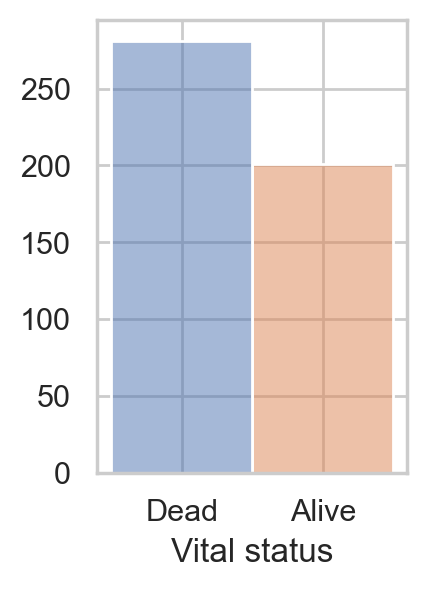

In [89]:
## Plot dead and alive
plt.figure(figsize=(2,3),dpi=200)
ax = sns.histplot(data=df,x="Alive", hue="Alive", legend=False)
ax.set(xlabel="Vital status", ylabel="")
plt.show()


In the above plot we can see that more mountaineers in this list are dead than alive. This doesn't tell us much, the past is bigger than the present. Let's dig in a bit.

## Number of dead/alive mountaineers by country

In [90]:
## make df for plotting
plot_data = pd.DataFrame(df[["Country"]].groupby(["Country"]).value_counts()).reset_index()
plot_data.columns = ["Country", "Count"]
plot_data = plot_data.sort_values("Count", ascending=False).head(25)

dead_ones = df[["Country", "Alive"]].groupby(["Country", "Alive"]).value_counts().reset_index().sort_values(0, ascending=False)
dead_ones.columns = ["Country", "Alive", "Dead"]
plot_data = pd.merge(plot_data, dead_ones[["Dead", "Country"]][dead_ones["Alive"]=="Dead"].head(25), on="Country", how="left").fillna(0)

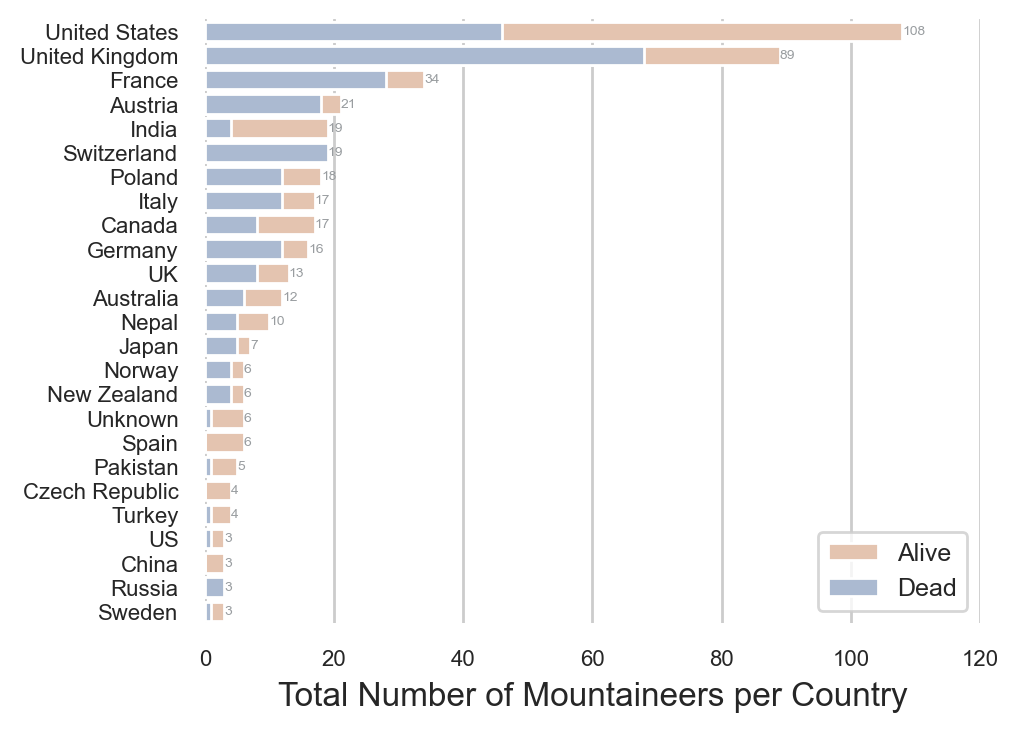

In [91]:
## Plot per country
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(5,4),dpi=200)

sns.set_color_codes("pastel")
sns.barplot(x="Count", 
            y="Country", 
            data=plot_data,
            label="Alive", 
            color = "#EDC2A7", 
            order=plot_data.sort_values('Count', ascending=False).Country)

sns.set_color_codes("muted")
sns.barplot(x="Dead", 
            y="Country", 
            data=plot_data,
            label="Dead", 
            color = "#A5B8D7", 
            order=plot_data.sort_values('Count', ascending=False).Country)

ax.legend(ncol=1, loc="lower right", frameon=True, fontsize=9)
ax.set(xlim=(0, 120), ylabel="",
       xlabel="Total Number of Mountaineers per Country")
ax.bar_label(ax.containers[0], size=5, label_type="edge", padding=0, color="#999DA0")

ax.tick_params(labelsize=8)

sns.despine(left=True, bottom=True)

The __vast__ majority of climbers and mountaineers in this list are from either the US or the UK. The UK has historically been a [pioneering mountaineering country](https://en.wikipedia.org/wiki/Golden_age_of_alpinism), whereas the US produced many legendary climbers _and_ mountaineers in the 20th century.

## Age distribution by vital status

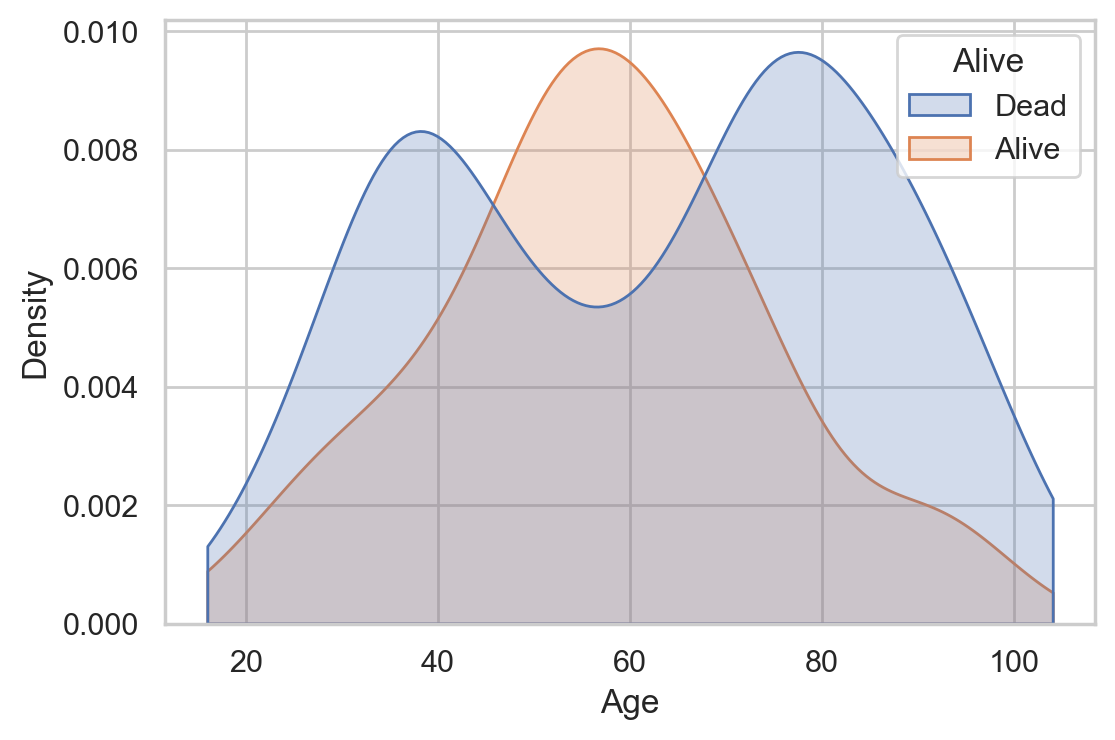

In [92]:
plt.figure(figsize=(6,4),dpi=200)
sns.kdeplot(data=df,x="Age",hue="Alive",fill=True, clip=[df["Age"].min(),df["Age"].max()]);

In the plot above we see a first pattern: Those legendary mountaineers still alive show an almost bell-shaped age distribution, with a mean around 55 years. Of course it takes some striking accomplishments to end up in this list, which is the reason for the thinning left end. More interesting, however, is the bimodal distribution of the dead ones: We see one peak at around 38 years and another on around 78 years. Let's have a closer look at those that no longer climb mountains.

Life expectancy changed quite drastrically in the last centuries; let's have a look at how this manifested in mountaineers.

## Age at death by century born

In [93]:
df["Century"] = np.where(df['Born'] < 1900, "before 1900", "after 1900")
df.sample(10)

,Name,Born,Died,Country,Age,Alive,Century
381,Arne Næss jr.,1937.0,2004.0,Norway,67.0,Dead,after 1900
90,Renata Chlumska,1973.0,NaN,Sweden,49.0,Alive,after 1900
189,Chloé Graftiaux,1987.0,2010.0,Belgium,23.0,Dead,after 1900
352,A. W. Moore,1841.0,1887.0,United Kingdom,46.0,Dead,before 1900
518,John Tyndall,1820.0,1893.0,United Kingdom,73.0,Dead,before 1900
106,Janne Corax,1967.0,NaN,Sweden,55.0,Alive,after 1900
273,Robert Kayen,1959.0,NaN,United States,63.0,Alive,after 1900
553,Fritz Wiessner,1900.0,1988.0,United States,88.0,Dead,after 1900
31,Richard Bass,1929.0,2015.0,United States,86.0,Dead,after 1900
402,Elizabeth Parker,1856.0,1944.0,Canada,88.0,Dead,before 1900


Text(72, 0.011, '1950')

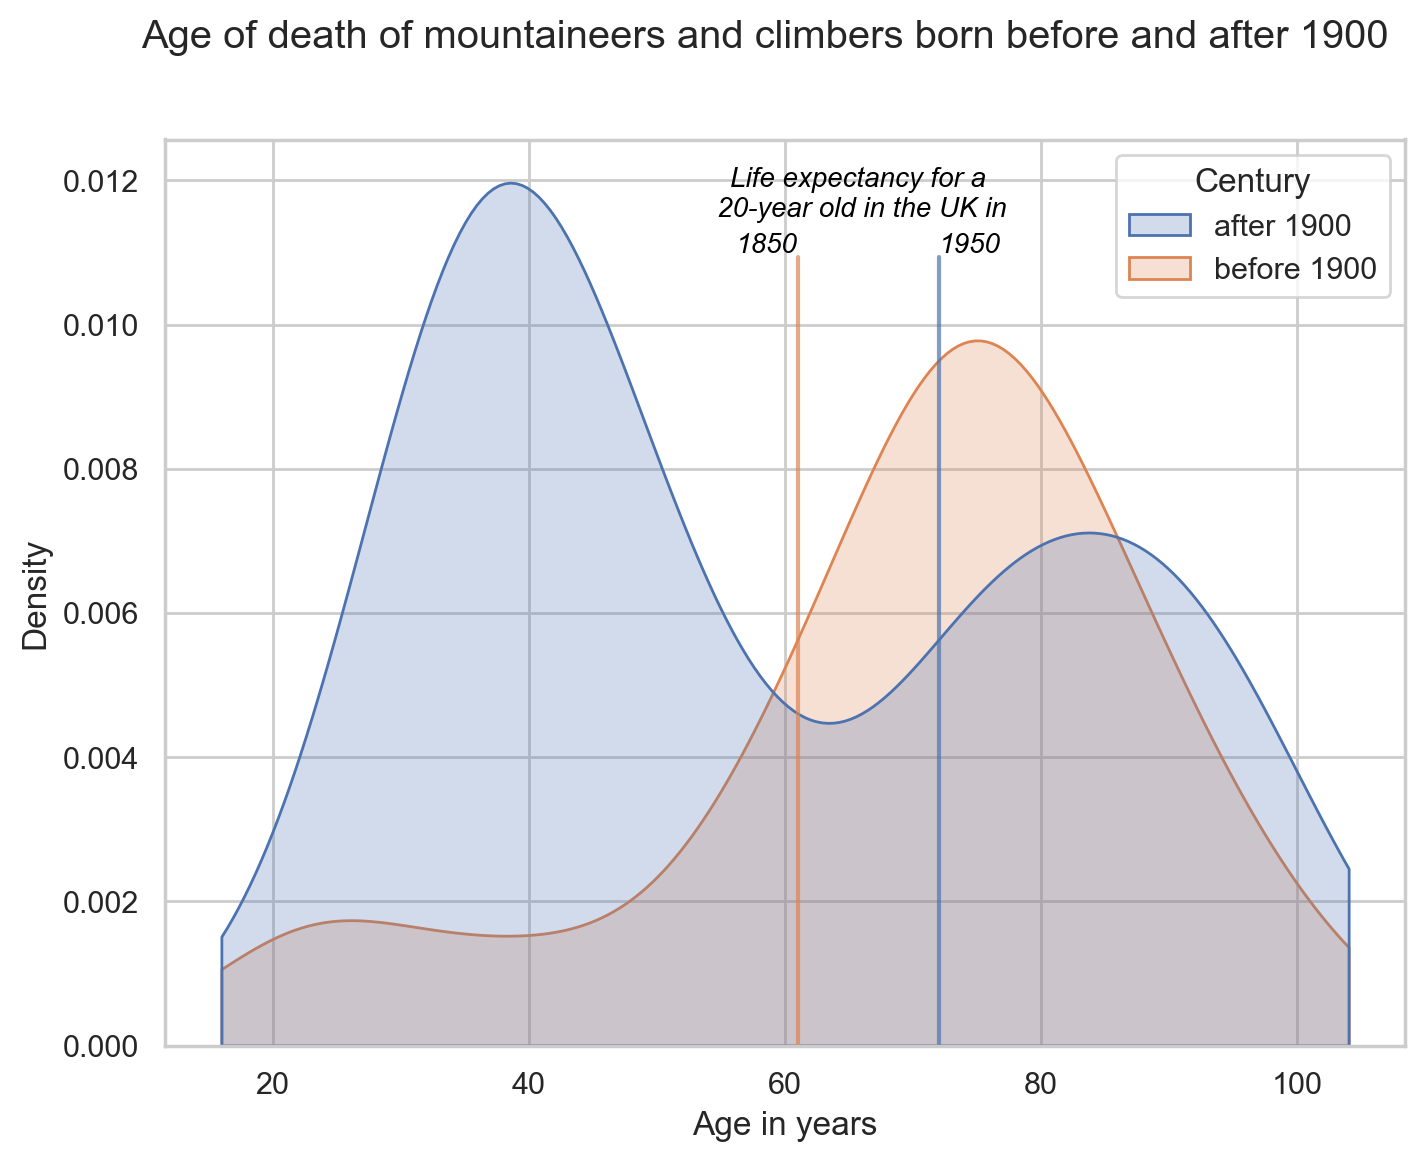

In [102]:
plt.figure(figsize=(8,6),dpi=200)

sns.kdeplot(data=df[df["Alive"] == "Dead"],x="Age",hue="Century",fill=True,clip=[df["Age"].min(),df["Age"].max()])
plt.xlabel('Age in years')
plt.suptitle("Age of death of mountaineers and climbers born before and after 1900")

plt.axvline(61, 0, 0.87,color="#DD8452",alpha=.7) # life expectancy for a 20 year old in the UK 1850 https://ourworldindata.org/life-expectancy
plt.axvline(72, 0, 0.87,color="#4C73AF",alpha=.7) # life expectancy for a 20 year old in the UK 1950

plt.text(66, 0.0115, "Life expectancy for a \n20-year old in the UK in", horizontalalignment='center', size='small', color='black',style="italic")
plt.text(61, 0.011, "1850", horizontalalignment='right', size='small', color='black',style="italic")
plt.text(72, 0.011, "1950", horizontalalignment='left', size='small', color='black',style="italic")

__Spännande!__ Those mountaineers born before 1900 show a peak far above the [mean life expectancy of a 20-year old in the UK in 1850](https://ourworldindata.org/life-expectancy), clearly indicating that not many died of an unnatural death somewhere in the mountains. The reason being probably that neither high altitude mountaineering nor modern climbing existed, the dangers of a fatal accident were thus considerably lower. Those early pioneers discovered rather what we'd call hiking nowadays. 

__What about their increased life expectancy?__ Well, physical exercise in fresh air clearly contributes to a healthy and long life. A greater contributer however, might be their socio-economic status: Almost all mountaineers back then had a wealthy and aristocratic background and were spared a life of physical labour.

__For the modern climbers__ born 1900 or later, we see another bimodal distribution: The right hand peak arguably represents those that died of a natural death, again, well above the mean life expectancy on a population level in 1950. This time, however, it might rather be physical exercise and a healthy lifestyle supporting a longer life, since many of the famous climbers after 1900 were in fact working class or farmers (possibly adding to their recklessness).

__The peak to the left at around 38 years__ likely support the general stereotype of the daredevil in the mountain, riksing their life for purposeless yest meaningful joy. Let's do a quick and dirty check if this assumption about the type of cause of death holds.

In [95]:
## Subset data
dead_late = df[(df["Alive"] == "Dead") & (df["Century"]== "after 1900")]
dead_late["Death"] = np.where(dead_late["Age"] < 60, "premature", "natural");
dead_late.sample(10)

/var/folders/xb/pt024ps902n3_j_408fhg66h0000gn/T/ipykernel_36328/2388800693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dead_late["Death"] = np.where(dead_late["Age"] < 60, "premature", "natural");


,Name,Born,Died,Country,Age,Alive,Century,Death
58,Anatoli Boukreev,1958.0,1997.0,Russia,39.0,Dead,after 1900,premature
51,Jean-Marc Boivin,1951.0,1990.0,France,39.0,Dead,after 1900,premature
375,Tenzing Norgay,1914.0,1986.0,Nepal,72.0,Dead,after 1900,natural
475,Pasang Lhamu Sherpa,1961.0,1993.0,Nepal,32.0,Dead,after 1900,premature
117,Andrzej Czok,1948.0,1986.0,Unknown,38.0,Dead,after 1900,premature
124,José Antonio Delgado,1965.0,2006.0,Venezuela,41.0,Dead,after 1900,premature
67,Jim Bridwell,1944.0,2018.0,United States,74.0,Dead,after 1900,natural
57,Christine Boskoff,1967.0,2006.0,United States,39.0,Dead,after 1900,premature
457,Alan Rouse,1951.0,1986.0,United Kingdom,35.0,Dead,after 1900,premature
205,Peter Harding,1924.0,2007.0,United Kingdom,83.0,Dead,after 1900,natural


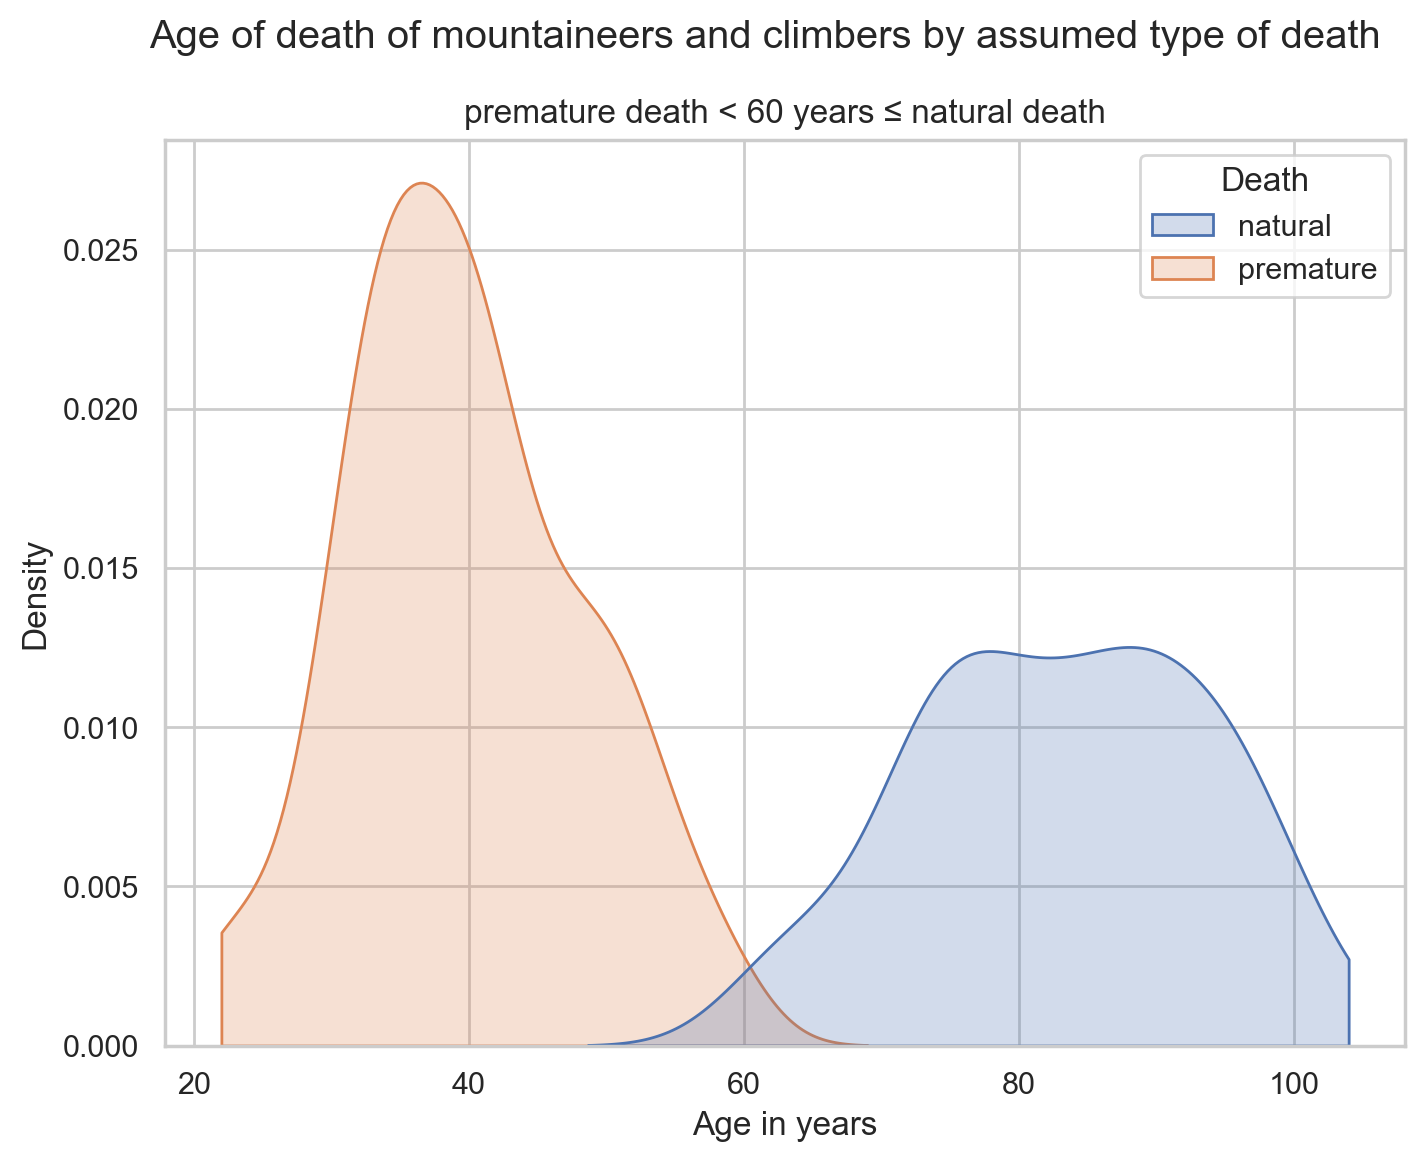

In [96]:
plt.figure(figsize=(8,6),dpi=200)

sns.kdeplot(data=dead_late,x="Age",hue="Death",fill=True,clip=[dead_late["Age"].min(),dead_late["Age"].max()])
plt.xlabel('Age in years')
plt.suptitle("Age of death of mountaineers and climbers by assumed type of death")
plt.title("premature death < 60 years ≤ natural death")
plt.show()

Above we can see the distribution of those we assumed dead because of an accident, and those who arguably died a natual death. The cutoff point at 60 years seems a good seperator of the two curves, but other than that arbitrary. Let's take a random sample of those that died a premature death (>60 years) and look up their causes of death.

In [269]:
dead_late[dead_late["Death"] == "premature"].sample(10, random_state=42)

,Name,Born,Died,Country,Age,Alive,Century,Death
488,Frank Smythe,1900,1949.0,United Kingdom,49.0,Dead,after 1900,premature
298,Toni Kurz,1913,1936.0,Germany,23.0,Dead,after 1900,premature
398,Tsewang Paljor,1968,1996.0,India,28.0,Dead,after 1900,premature
243,Dimitar Ilievski,1953,1989.0,Macedonia,36.0,Dead,after 1900,premature
237,Tomaž Humar,1969,2009.0,Slovenia,40.0,Dead,after 1900,premature
212,Dougal Haston,1940,1977.0,UK,37.0,Dead,after 1900,premature
132,Hans Christian Doseth,1958,1984.0,Norway,26.0,Dead,after 1900,premature
475,Pasang Lhamu Sherpa,1961,1993.0,Nepal,32.0,Dead,after 1900,premature
72,Hermann Buhl,1924,1957.0,Austria,33.0,Dead,after 1900,premature
1,Yevgeniy Abalakov,1907,1948.0,Russia,41.0,Dead,after 1900,premature


"[__Frank Smythe__] was taken ill with food poisoning; then a succession of malaria attacks took their toll"

"[__Toni Kurz__] died in 1936 during an attempt to climb the then-unclimbed north face of the Eiger with his partner Andreas Hinterstoisser."

"__Tsewang Paljor__, an Indian climber who died on Everest in 1996."

"[__Dimitar Ilievski__] died on the descent of Mt. Everest."

"[__Tomaž Humar__] was stuck on the mountain at an elevation of approximately 6,300 meters (20,700 ft) for several days before his body was found on November 14, 2009, at an elevation of 5,600 meters"

"[__Dougal Haston__] was killed in an avalanche in January 1977"

"__Hans Christian Doseth__ died (...) during an expedition (...) on Great Trango Tower (6286 m) in Karakoram, Pakistan"

"__Pasang Lhamu Sherpa__, w]hile descending from the summit, the weather, as often happens in the mountains, suddenly turned bad, causing her to lose her own life on the south summit."

"[__Hermann Buhl__] lost his way in an unexpected snow storm and walked over a huge cornice on the south-east ridge, near the summit of Chogolisa II"

"In the spring of 1948 __Abalakov__ died in Moscow, in obscure circumstances, while preparing for the ascent to the Victory Peak. "   <br>


(Source: [Wikipedia](https://en.wikipedia.org))

## Do mountaineers die younger?

![Hermann Buhl](buhl.jpeg)

Well, __9 out of 10__ died literally on the mountain, one of them on an expedition to a mountain, clearly corroborating the general view that extreme mountaineering and climbing is dangerous and often deadly at young age. Whether this is selfish or not, [others may judge.](https://www.nytimes.com/2019/04/27/opinion/mountain-climbing.html)